# Знакомство с проектом (описание)
## Описание
В нашем распоряжении база данных клиентов банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск. Необходимо исследовать клиентов с целью удержания.

Колонки:

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.
## Цель
Сегментация клиентов по количеству потребляемых продуктов для удержания клиентов, уменьшения оттока.
## Задача
Проанализировать клиентов регионального банка и сегментировать пользователей по количеству потребляемых продуктов.
# Загрузка данных, первичный осмотр и предобработка данных
# Исследовательский анализ
# Сегментирование пользователей по количество потребляемых продуктов
## Составление портрета клиентов
# Проверка гипотез
## Формулировка гипотез
## Проверка гипотез
# Вывод
## Общий вывод
## Рекомендации для каждого сегмента

# Шаг 1. Загрузка данных, первичный осмотр и предобработка данных
## Загрузим библиотеки и датасет

In [1]:
# импортируем библиотеки
import pandas as pd
import math as mth
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats as st
from statsmodels.stats import weightstats as stests
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from statsmodels.stats.proportion import proportions_ztest

In [2]:
# уберем красные предупреждения
import warnings
warnings.filterwarnings('ignore')

In [3]:
# прочитаем файлы:

try:
    df = pd.read_csv('bank_dataset.csv')

except:
    try:
        df = pd.read_csv('/datasets/bank_dataset.csv')

    except:
        df = pd.read_csv('https://disk.yandex.ru/d/JVAJ9uxtV1uydQ/bank_dataset.csv')

## Посмотрим данные

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [5]:
df.head()

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


Видим, что названия столбцов имеют разный регистр; имеются пропуски в столбце `Balance`. Количество пропусков значительное. 

Скорректируем названия столбцов

In [6]:
# скорректируем названия столбцов
df = df.rename(columns={'userid': 'user_id', 'CreditCard': 'credit_card'})
df.columns = df.columns.str.lower()
df

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,96270.64,0
9996,15612628,516,Ярославль,М,35,10,57369.61,1,1,1,101699.77,0
9997,15627268,709,Ярославль,Ж,36,7,NaN,1,0,1,42085.58,1
9998,15725091,772,Ростов Великий,М,42,3,75075.31,2,1,0,92888.52,1


## Вывод
* названия столбцов имеют разный регистр; имеются пропуски в столбце `balance`
* все пользователи уникальны


# Шаг 2. Исследовательский анализ

## Изучим каждый столбец

In [7]:
df['user_id'].value_counts()

15677338    1
15710668    1
15808921    1
15710368    1
15641760    1
           ..
15641814    1
15745036    1
15703471    1
15714126    1
15671055    1
Name: user_id, Length: 10000, dtype: int64

Видим, что все пользователи уникальны

In [8]:
df['score'].value_counts()

850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: score, Length: 460, dtype: int64

In [9]:
df['score'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: score, dtype: float64

Видим, что наивысший балл - 850 единиц, у 233 пользователей. Средний показатель - 650 единиц. Стандартное отклонение - 96 ед.

In [10]:
df['city'].value_counts()

Ярославль         5014
Ростов Великий    2509
Рыбинск           2477
Name: city, dtype: int64

Видим, что больше всего пользователей из г. Ярославль (около 50%), и примерно по 25% пользователей для каждого из городов: Ростов Великий и Рыбинск

In [11]:
df['gender'].value_counts()

М    5457
Ж    4543
Name: gender, dtype: int64

Видим, что пользователей мужского пола чуть-чуть больше чем женского, примерно 55% и 45% соответственно

In [12]:
df['age'].value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: age, Length: 70, dtype: int64

In [13]:
df['age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: age, dtype: float64

Видим, что средний возраст пользователей - 38 полных лет. Стандартное отклонение - 10 лет.

In [14]:
df['objects'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: objects, dtype: int64

Видим, топ-3 по количеству объектов у клиентов: 2 объекта (1048), 1 объект(1035) и 7 объектов (1028)

In [15]:
df['balance'].value_counts()

105473.74    2
130170.82    2
83807.86     1
85304.27     1
159397.75    1
            ..
81556.89     1
112687.69    1
108698.96    1
238387.56    1
130142.79    1
Name: balance, Length: 6381, dtype: int64

In [16]:
df['balance'].describe()

count      6383.000000
mean     119827.493793
std       30095.056462
min        3768.690000
25%      100181.975000
50%      119839.690000
75%      139512.290000
max      250898.090000
Name: balance, dtype: float64

Видим, что средний баланс на счете - 119 827 у.е.
Т.к. мы имеем большое количество пропусков, посмотрим имеем ли взаимосвязь признак `Balance` с каким либо другим признаком

In [17]:
df.corr()

,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
user_id,1.000000,0.005308,0.009497,-0.014883,-0.008690,0.016972,-0.014025,0.001665,0.015271,-0.006248
score,0.005308,1.000000,-0.003965,0.000842,-0.004744,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,0.009497,-0.003965,1.000000,-0.009997,-0.012822,-0.030680,-0.011721,0.085472,-0.007201,0.285323
objects,-0.014883,0.000842,-0.009997,1.000000,0.005827,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,-0.008690,-0.004744,-0.012822,0.005827,1.000000,-0.001027,0.006721,-0.020418,-0.001856,0.017208
products,0.016972,0.012238,-0.030680,0.013444,-0.001027,1.000000,0.003183,0.009612,0.014204,-0.047820
credit_card,-0.014025,-0.005458,-0.011721,0.022583,0.006721,0.003183,1.000000,-0.011866,-0.009933,-0.007138
loyalty,0.001665,0.025651,0.085472,-0.028362,-0.020418,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimated_salary,0.015271,-0.001384,-0.007201,0.007784,-0.001856,0.014204,-0.009933,-0.011421,1.000000,0.012097
churn,-0.006248,-0.027094,0.285323,-0.014001,0.017208,-0.047820,-0.007138,-0.156128,0.012097,1.000000


Видим, что у признака `balance` везде связь низкая. Создадим две группы: 0 - имеются пропуски в признаке `balance`, 1 - нет пропусков

In [18]:
df['group_balance'] = 0 # создаем новый столбец
df.loc[df['balance'] > 0, 'group_balance'] = 1 # срез с условие
df.groupby('group_balance').agg('mean') # агрегируем данные

,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
group_balance,,,,,,,,,,
0,1.573469e+07,649.452861,38.434891,5.071330,NaN,1.784628,0.716616,0.517832,98983.559549,0.138236
1,1.573310e+07,651.138493,39.197713,4.979633,119827.493793,1.386025,0.699201,0.513552,100717.352956,0.240796


Видим, что у группы с отсутсвующим балансом в спеднем ниже рейтинг, возраст, отток, но выше количество продуктов. У группы с балансом рейтинг повыше, возраст выше, продуктов меньше, отток больше. Предположение: клиент не пользуется продкутом со счетом по которому считается баланс, например, кредитный проект. Соотвутственно такие балансы можно заполнить нулями.

## Изучим клиентов с отсутствующим балансом

In [19]:
df_w0 = df.query('group_balance == 0')
df_w0

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,group_balance
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,0
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,0
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0,0
11,15779909,497,Рыбинск,М,24,3,NaN,2,1,0,76390.01,0,0
12,15675000,476,Ярославль,Ж,34,10,NaN,2,1,0,26260.98,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,15648358,841,Рыбинск,М,28,4,NaN,2,1,1,179436.60,0,0
9992,15699841,726,Рыбинск,М,36,2,NaN,1,1,0,195192.40,0,0
9994,15762030,800,Ярославль,Ж,29,2,NaN,2,0,0,167773.55,0,0
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,96270.64,0,0


In [20]:
df_w0['score'].describe()

count    3617.000000
mean      649.452861
std        96.158798
min       350.000000
25%       583.000000
50%       651.000000
75%       717.000000
max       850.000000
Name: score, dtype: float64

Видим, что среднее значение скоринга 650, стандартное отклонение 96, медиана 651

In [21]:
df_w0['city'].value_counts()

Ярославль    2418
Рыбинск      1199
Name: city, dtype: int64

Видим, что нет информации только у клиентов из Ярославля (2418) и Рыбинска (1199)

In [22]:
df_w0['gender'].value_counts()

М    1963
Ж    1654
Name: gender, dtype: int64

Видим, что клиентов-мужчин: 1963 и женщин: 1654

In [23]:
df_w0['age'].describe()

count    3617.000000
mean       38.434891
std        10.492002
min        18.000000
25%        31.000000
50%        37.000000
75%        43.000000
max        88.000000
Name: age, dtype: float64

Видим, что средний возраст клиентов с отсутсвующим балансом - 38 лет, стандартное отклонение 10, медиана - 37

In [24]:
df_w0['objects'].describe()

count    3617.000000
mean        5.071330
std         2.860781
min         0.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: objects, dtype: float64

Видим, что в среднем у таких клиентов 5 объектов, стандартное отклонение около 3, медиана 5

In [25]:
df_w0['products'].describe()

count    3617.000000
mean        1.784628
std         0.496455
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: products, dtype: float64

Видим, что в среднем такие клиенты пользуются 2 продуктами, стандартное отклонение 0,5, медиана 2

In [26]:
df_w0['credit_card'].describe()

count    3617.000000
mean        0.716616
std         0.450704
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: credit_card, dtype: float64

Видим, что около 72% таких клиентов пользуются кредитными картами

In [27]:
df_w0['loyalty'].describe()

count    3617.000000
mean        0.517832
std         0.499751
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: loyalty, dtype: float64

Видим, что около 52% таких клиентов активны

In [28]:
df_w0['estimated_salary'].describe()

count      3617.000000
mean      98983.559549
std       57730.828955
min          90.070000
25%       49506.820000
50%       98618.790000
75%      148330.970000
max      199992.480000
Name: estimated_salary, dtype: float64

Видим, что в среднем у таких клиентов доход составляет 98 984 у.е. Стандартное отклонение 57 731 у.е., медианан 98 619 у.е.

In [29]:
df_w0['churn'].describe()

count    3617.000000
mean        0.138236
std         0.345195
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: churn, dtype: float64

Видим, что отток у таких клиентов низкий, составляет около 14%

## Вывод:
* среднее значение скоринга 650, стандартное отклонение 96, медиана 651
* нет информации о балансе только у клиентов из Ярославля (2418) и Рыбинска (1199)
* клиентов-мужчин: 1963 и женщин: 1654
* средний возраст клиентов с отсутсвующим балансом - 38 лет, стандартное отклонение 10, медиана - 37
* в среднем у таких клиентов 5 объектов, стандартное отклонение около 3, медиана 5
* среднем такие клиенты пользуются 2 продуктами, стандартное отклонение 0,5, медиана 2
* около 72% таких клиентов пользуются кредитными картами
* около 52% таких клиентов активны
* в среднем у таких клиентов доход составляет 98 984 у.е. Стандартное отклонение 57 731 у.е., медианан 98 619 у.е.
* отток у таких клиентов низкий, составляет около 14%

In [30]:
df = df.fillna(0)
df

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,group_balance
0,15677338,619,Ярославль,Ж,42,2,0.00,1,1,1,101348.88,1,0
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,1
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,1
3,15744090,699,Ярославль,Ж,39,1,0.00,2,0,0,93826.63,0,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,Ярославль,М,39,5,0.00,2,1,0,96270.64,0,0
9996,15612628,516,Ярославль,М,35,10,57369.61,1,1,1,101699.77,0,1
9997,15627268,709,Ярославль,Ж,36,7,0.00,1,0,1,42085.58,1,0
9998,15725091,772,Ростов Великий,М,42,3,75075.31,2,1,0,92888.52,1,1


In [31]:
df['products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: products, dtype: int64

Видим, что чуть больше половины клиентов 5084 (около 51%) пользуются 1 продуктом, чуть меньше 4590 (околок 46%) - 2 продуктами, 266 (2,66%) - 3 продуктвами, и 60 клиентов ( 0,06%) пользуются 4 продуктами

In [32]:
df['credit_card'].value_counts()

1    7055
0    2945
Name: credit_card, dtype: int64

Видим, что около 70% (7055  клиентов) имеют кредитную карту и около 30% (2945 клиентов) не имеют

In [33]:
df['loyalty'].value_counts()

1    5151
0    4849
Name: loyalty, dtype: int64

Видим, что 5151 клиент (около 51%) - активные клиенты и 4849 (около 49%) неактивные

In [34]:
df['estimated_salary'].value_counts()

24924.92     2
101348.88    1
55313.44     1
72500.68     1
182692.80    1
            ..
120893.07    1
188377.21    1
55902.93     1
4523.74      1
38190.78     1
Name: estimated_salary, Length: 9999, dtype: int64

In [35]:
df['estimated_salary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: estimated_salary, dtype: float64

Видим, что средний доход составляет 100 090 у.е. Стандартное отклонение составляет 57 511 у.е.

In [36]:
df['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

Видим, что 7963 клиентов удержано (около 80%), ушло 2037 клиента (около 20%)

## Посомтрим дубликаты

In [37]:
df.duplicated().sum()

0

Видим, что полных дубликатов нет

## Выводы:
* наивысший балл - 850 единиц, у 233 пользователей. Средний показатель - 650 единиц. Стандартное отклонение - 96 ед.
* больше всего пользователей из г. Ярославль (около 50%), и примерно по 25% пользователей для каждого из городов: Ростов Великий и Рыбинск
* пользователей мужского пола чуть-чуть больше чем женского, примерно 55% и 45% соответственно
* средний возраст пользователей - 38 полных лет. Стандартное отклонение - 10 лет.
* топ-3 по количеству объектов у клиентов: 2 объекта (1048), 1 объект(1035) и 7 объектов (1028)
* средний баланс на счете - 119 827 у.е. Т.к. мы имеем большое количество пропусков
* у признака `balance` везде связь низкая. Скорей всего был сбой при выгрузке данных
* чуть больше половины клиентов 5084 (около 51%) пользуются 1 продуктом, чуть меньше 4590 (околок 46%) - 2 продуктами, 266 (2,66%) - 3 продуктвами, и 60 клиентов ( 0,06%) пользуются 4 продуктами
* около 70% (7055 клиентов) имеют кредитную карту и около 30% (2945 клиентов) не имеют
* 5151 клиент (около 51%) - активные клиенты и 4849 (около 49%) неактивные
* средний доход составляет 100 090 у.е. Стандартное отклонение составляет 57 511 у.е.
* 7963 клиентов удержано (около 80%), ушло 2037 клиента (около 20%)
* дубликатов нет

## Шаг 2. Исследовательский анализ

### Посмотрим на средние значения признаков  в четырех группах соответсвующих количеству используемых продуктов

Удалим признак `user_id` т.к. он не потребуется в анализе

In [38]:
df = df.drop(columns='user_id')

In [39]:
# применим метод groupby()
df.groupby('products').agg('mean').style.format(precision=2, thousands=" ")

,score,age,objects,balance,credit_card,loyalty,estimated_salary,churn,group_balance
products,,,,,,,,,
1,649.12,39.67,4.97,98 551.87,0.70,0.50,99 487.26,0.28,0.82
2,652.19,37.75,5.05,51 879.15,0.71,0.53,100 452.01,0.08,0.43
3,648.11,43.20,5.00,75 458.33,0.71,0.42,104 318.13,0.83,0.63
4,653.58,45.68,5.30,93 733.13,0.68,0.48,104 763.72,1.00,0.77


* `score`: рейтинг у 4 группы самый высокий (653), самый низкий у 3 (648)
* `age`: самые молодые клиенты из группы 2 (37 полных лет), самые взрослые - 4 (45 полных лет)
* `objects`: у всех групп клиентов в среднем 5 объектов
* `balance`: у трех групп 1,2,3 в среднее значение на балансе 119 тыс. у.е., но у 4 все же больше - 122 тыс. у.е.
* `credit_card`: меньше всего кредитных карт у клиентов из 4 группы (0,68), у групп 1,2,3 в среднем одинаковое значение клиентов с кредитными картам (0,7)
* `loyalty`: наибольшее количество клиентов во 2 группе (0,53), наименьшее у 3
* `estimated_salary`: в среднем заработная плата у клиентов из первой группы самая низкая (99 487 у.е), наибольшая у клиентов из 4 группы (104 763 у.е.)
* `churn`: клиенты из группы 4 все отточные, наименьший оттко у клиентов из группы 2 (7,6%)
* `group_balance`: меньше всего у группы 2 и 3

Изучим 2 и 3 группы

In [40]:
df_2_3 = df.loc[(df['products'] == 2)]
df_2_3.head(10)

,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,group_balance
3,699,Ярославль,Ж,39,1,0.00,2,0,0,93826.63,0,0
5,645,Рыбинск,М,44,8,113755.78,2,1,0,149756.71,1,1
6,822,Ярославль,М,50,7,0.00,2,1,1,10062.80,0,0
8,501,Ярославль,М,44,4,142051.07,2,0,1,74940.50,0,1
10,528,Ярославль,М,31,6,102016.72,2,0,0,80181.12,0,1
11,497,Рыбинск,М,24,3,0.00,2,1,0,76390.01,0,0
12,476,Ярославль,Ж,34,10,0.00,2,1,0,26260.98,0,0
13,549,Ярославль,Ж,25,5,0.00,2,0,0,190857.79,0,0
14,635,Рыбинск,Ж,35,7,0.00,2,1,1,65951.65,0,0
15,616,Ростов Великий,М,45,3,143129.41,2,0,1,64327.26,0,1


Видим, что встречаются города Ярославль и Рыбинск. Посмотрим как часто встречаются данные города

In [41]:
df_2_3['city'].value_counts()

Ярославль         2367
Рыбинск           1183
Ростов Великий    1040
Name: city, dtype: int64

Заменим города на цифры 1- Ярославль, 2 - Рыбинск, 3 - Ростов Великий, для выявления взаимосвязи

In [42]:
df_2_3['city'] = df_2_3['city'].map({'Ярославль': 1, 'Рыбинск': 2, 'Ростов Великий': 3})

In [43]:
df_2_3.corr()

,score,city,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,group_balance
score,1.000000,0.002558,-0.004299,-0.014975,0.003825,NaN,-0.014332,0.031784,0.008009,-0.025565,0.008712
city,0.002558,1.000000,0.032919,0.001761,0.504081,NaN,0.014418,0.003312,-0.001419,0.092902,0.534820
age,-0.004299,0.032919,1.000000,-0.029182,0.030488,NaN,-0.000244,0.140358,0.007171,0.194940,0.032951
objects,-0.014975,0.001761,-0.029182,1.000000,-0.025119,NaN,0.021487,-0.035000,0.026579,-0.013790,-0.027166
balance,0.003825,0.504081,0.030488,-0.025119,1.000000,NaN,-0.008398,-0.000447,0.028790,0.175468,0.946711
products,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
credit_card,-0.014332,0.014418,-0.000244,0.021487,-0.008398,NaN,1.000000,0.005004,-0.011468,-0.018271,-0.018653
loyalty,0.031784,0.003312,0.140358,-0.035000,-0.000447,NaN,0.005004,1.000000,0.000297,-0.081573,0.000470
estimated_salary,0.008009,-0.001419,0.007171,0.026579,0.028790,NaN,-0.011468,0.000297,1.000000,0.002138,0.027807
churn,-0.025565,0.092902,0.194940,-0.013790,0.175468,NaN,-0.018271,-0.081573,0.002138,1.000000,0.184558


Видим, что средняя связь между группами по балансу и городом. Сагрегируем города и посмотрим на признак `group_balance`

In [44]:
df_2_3.groupby('city')['group_balance'].agg('mean')

city
1    0.265315
2    0.272189
3    1.000000
Name: group_balance, dtype: float64

Видим, что у города Ростов Великий отсутсвуют пропуски в балансе. Скорей всего возникла ошибка в выгрузке данных из городов Ярославль и Рыбинск

## Визуализируем данные
Построим гистограммы для следующих признаков: `score`, `age`, `balance`, `estimated_salary`

In [45]:
def hist(data, column):
        
    min_value = min(data[column])
    max_value = max(data[column])
    
    plt.figure(figsize=(12,7))
    sns.distplot(data[column], norm_hist=True)
    plt.ylabel('Частота')
    plt.xlabel(f'Признак {column}')
    plt.title(f'Распределение параметра {column}')
    
    
    plt.show()

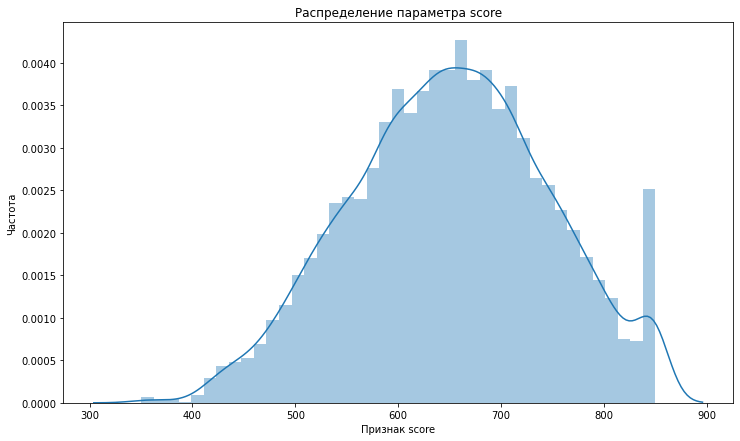

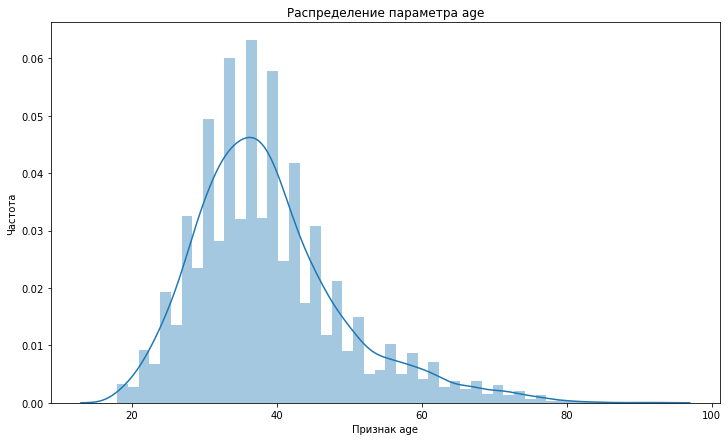

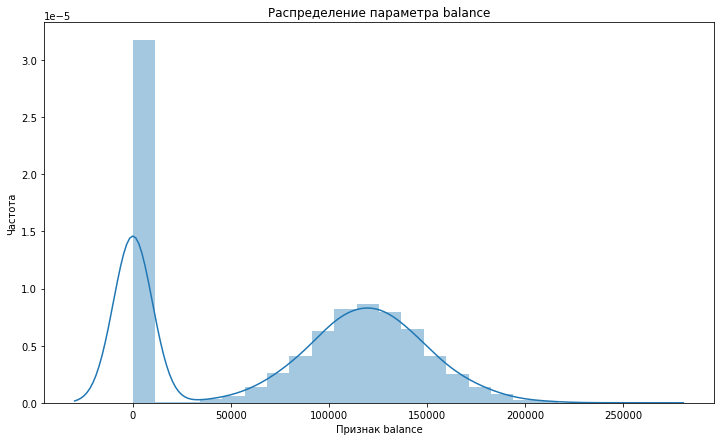

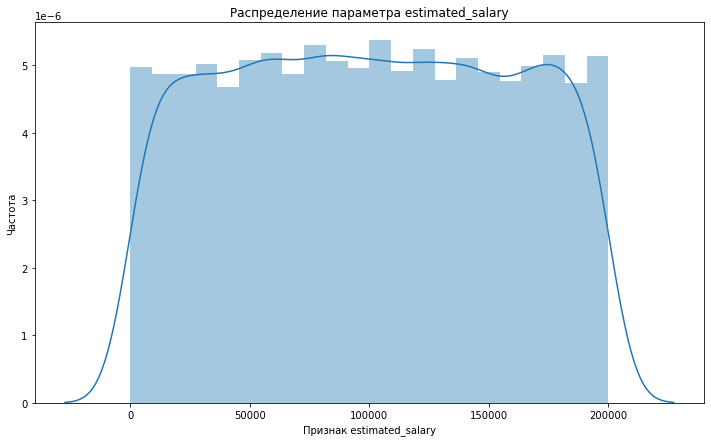

In [46]:
col = ['score', 'age', 'balance', 'estimated_salary']

for i in col:
    hist(df, i)

Построим графики для остальных параметров

In [47]:
def coount_plot(data, column):
    
    plt.figure(figsize=(12,7))
    sns.countplot(x=column,data=data)
    plt.ylabel('Частота')
    plt.xlabel(f'Признак {column}')
    plt.title(f'Распределение параметра {column}')
    
    plt.show()

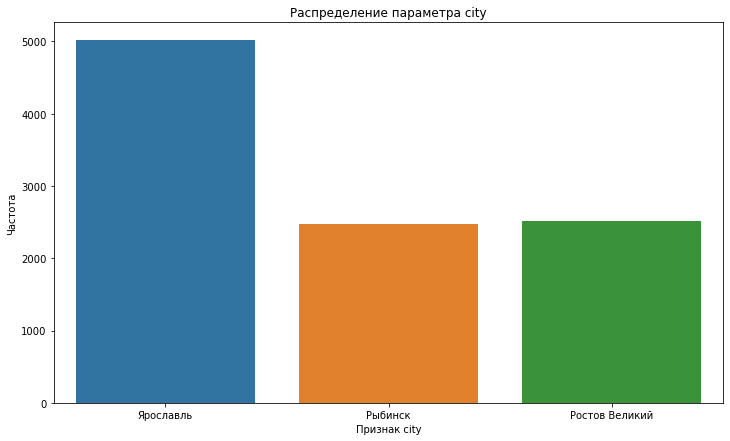

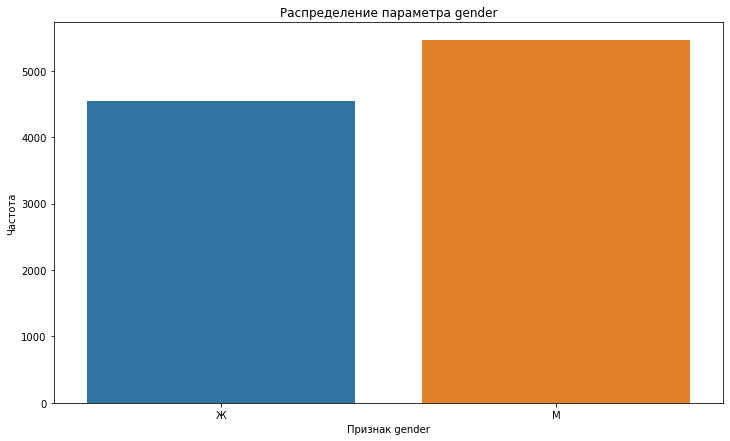

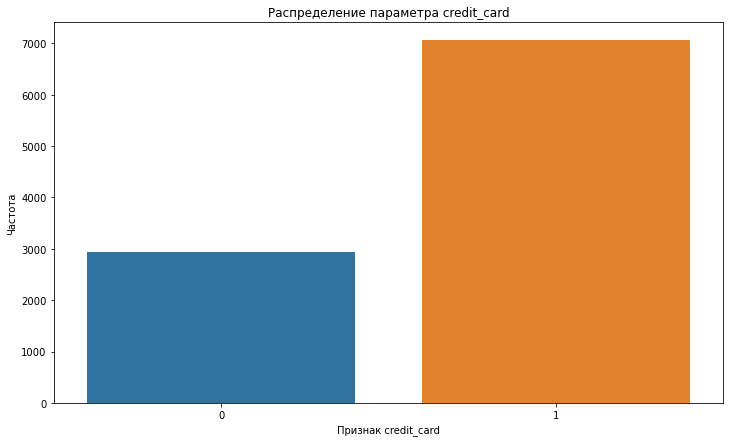

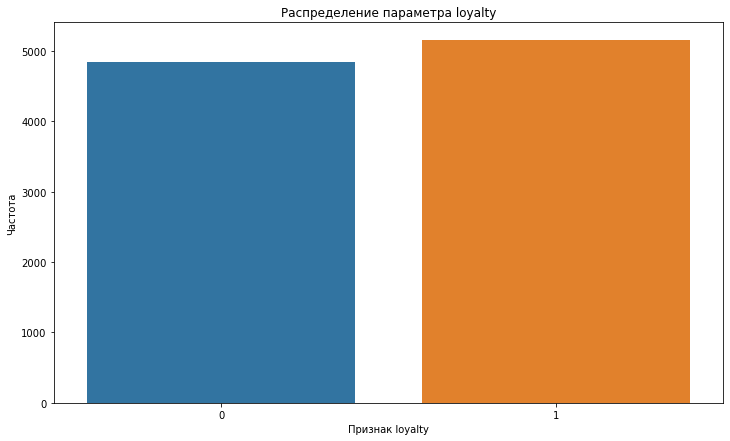

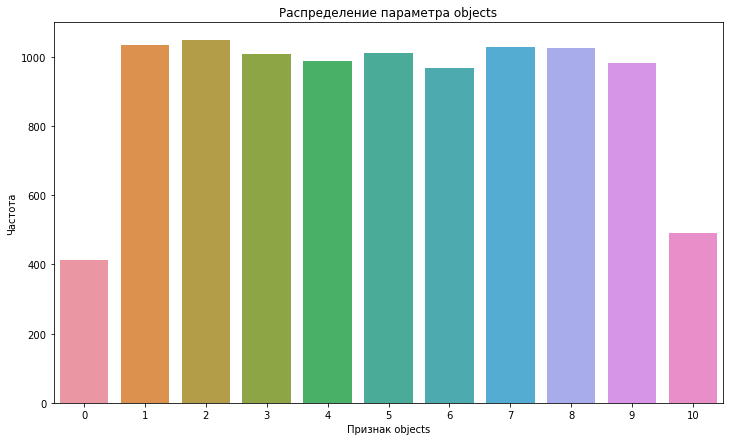

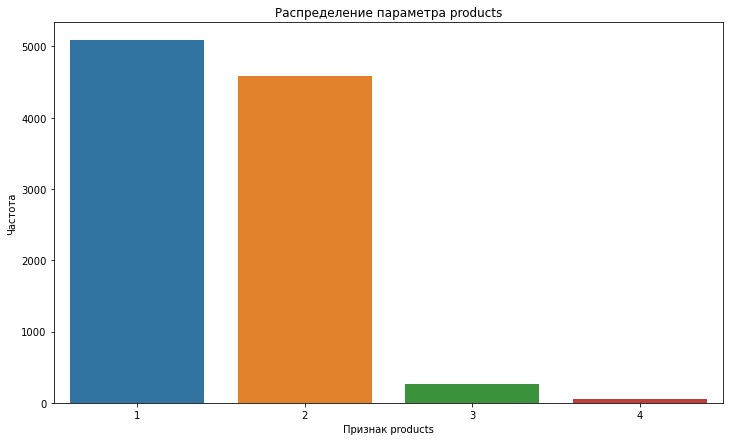

In [48]:
categ = ['city', 'gender', 'credit_card', 'loyalty', 'objects', 'products']

for i in categ:
    coount_plot(df, i)

## Выводы по графикам
* признаки: `score`, `age` имеют нормальное распределение 
* признак `balance` имеет в целом нормальное распределение, но из-за замены пропусков на 0, имеется выброс
* Количесво клиентов в Ярослвале приблизительно равно сумме клиентов в Рыбинске и Ростове Великом
* мужчин чуть-чуть больше чем женщин
* клиентов с кредитными картами примерно в 2 раза больше, чем без
* активных клиентов чуть больше чем неактивных
* клиентов с обектами от 1 до 9 почти одинаковое количство, что не сказать о клиентах с 0 и 10 объектами, их меньше почти в 2 раза
* в основном клиенты пользуются 1-2 продуктами, значительно реже 3 и 4

# Шаг 3. Сегментирование пользователей по количество потребляемых продуктов
## Составление портрета клиентов

С помощью машинного обучения сегментируем клиентов для составления портрета клиента.

Сперва необходимо скорретировать данные: удалить строковые данные, т.к. их невозможно стандартизировать


In [49]:
df_ml = df.drop(columns=['city', 'gender', 'group_balance'])

In [50]:
# стандартизируем данные
sc = StandardScaler()
X_sc = sc.fit_transform(df_ml)

Т.к. мы будем сегментировать клиентов по количеству продуктов, то сразу укажем количество кластеров равное 4

In [51]:
# задаём модель k_means с числом кластеров 4
km = KMeans(n_clusters = 4, random_state=0)

# прогнозируем кластеры для наблюдений 
labels = km.fit_predict(X_sc)

# сохраняем метки кластера в поле нашего датасета
df_ml['cluster_km'] = labels

# выводим статистику по средним значениям наших признаков по кластеру
df_ml.groupby('cluster_km').agg('mean')

,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
cluster_km,,,,,,,,,
0,652.424165,37.475150,4.908740,74174.772566,1.538989,0.000000,0.553985,100298.091448,0.000857
1,651.985194,37.288094,5.034855,122030.236709,1.332202,1.000000,0.561073,100482.444460,0.000000
2,645.246521,44.928429,4.928926,92240.603693,1.453777,0.696819,0.355865,101161.334935,1.000000
3,651.143449,37.507048,5.153814,4363.537177,1.851575,0.999585,0.548507,98468.475348,0.009536


Портреты клиентов:
* "0 - низкий отток" : клиенты со средним рейтингом (652 единицы), средний возраст (37 полных лет), количество объектов 5, баланс средний - 74 175 у.е., количество используемых продуктов - 1,5, не пользуются кредитными картами, активность средняя - 55%, средний доход (з/п) 100 298 у.е., отток менее 1%
* "1 - удержанные": клиенты со средним рейтингом (652 ед.), возраст - средний (37 полных лет), количество объектов 5, баланс счета самый высокий (122 030 у.е), с самым низким искользованием продуктов 1,3, 100% пользуются кредитными картами, средняя активность (56%), со средним доходом (100 483 у.е.), отток нулевой
* "2 - ушедшие": клиенты с самым низким рейтингом (645 ед.), средний возраст наивысший (45 лет), количесво объектов 5, баланс средний (92 241 у.е.), со средним использованием продуктов - 1,5, 70% пользуются кредитными картами, низкоактивные клиенты 36%, с наивысшим доходом (101 161 у.е.), отток менее 100%
* "3 - низкий отток": средний рейтинг (651 ед.), возраст - средний (37 лет), 5 объектов, самый низкий баланс (4 364 у.е.), средние использование продуктов - 1,85, почти все пользуются кредитными картами (99%), со средней активность - 55%, с самым низким доходом (98 469 у.е.), отток около 1%

# Шаг 4. Проверка гипотез
## Формулировка гипотез

### Выясним, статистически значимы ли различия доходов у клиентов с разным количеством продуктов

Сформулируем нулевую гипотезу H0:

* **Доходы клиентов, которые пользуются одним продуктом банка, и теми, которые пользуются больше одного, равны**

Сформулируем альтернативную гипотезу H1:

* **Доходы клиентов, которые пользуются одним продуктом банка, и теми, которые пользуются больше одного, различны**

Применим метод U-критерий Манна-Уитни, т.к. он подходит для любого вида распределений

In [52]:
alpha = 0.05

results = st.mannwhitneyu(
    df.query('products == 1')['estimated_salary'], 
    df.query('products > 1')['estimated_salary'], 
    alternative = 'two-sided')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

p-значение: 0.2850986972637063
Не удалось отвергнуть нулевую гипотезу


Видим, что нулевая гипотеза не отвергнута. Делаем вывод, что доходы клиентов, которые пользуются одним продуктом и теми, которые пользуются несколькими, не различаются

### Выясним, статистически значимы ли различия оттока клиентов с разным количеством продуктов у клиентов

Сформулируем нулевую гипотезу H0:

* **Отток клиентов, которые пользуются одним продуктом банка, и теми, которые пользуются больше одного, равны**

Сформулируем альтернативную гипотезу H1:

* **Отток клиентов, которые пользуются одним продуктом банка, и теми, которые пользуются больше одного, различны**

Применим z-критерий , т.к. будут сравниваться доли и количесво наблюдений больше 30

In [53]:
# посчитаем количество ушедших клиентов с одним продуктов
count_сhurn_1 = df.query('products == 1 and churn == 1')['churn'].count()
count_сhurn_1

1409

In [54]:
# посчитаем количество всех клиентов с одним продуктом
nobs_сhurn_1 = df.query('products == 1')['churn'].count()
nobs_сhurn_1

5084

In [55]:
# посчитаем количество ушедших клиентов с несколькими продкутами
count_сhurn_more = df.query('products > 1 and churn == 1')['churn'].count()
count_сhurn_more

628

In [56]:
# посчитаем количество всех клиентов с одним продуктом
nobs_сhurn_more = df.query('products > 1')['churn'].count()
nobs_сhurn_more

4916

In [57]:
# соберем полученные результаты

count_сhurn_1, nobs_сhurn_1 = (1409, 5084)
count_сhurn_more, nobs_сhurn_more = (628, 4916)

In [58]:
successes = np.array([count_сhurn_1, count_сhurn_more])
samples = np.array([nobs_сhurn_1, nobs_сhurn_more])

In [59]:
alpha = 0.05

results, pvalue = proportions_ztest(
    count = successes, 
    nobs = samples,
    alternative='two-sided')

print('p-значение:', pvalue)

if (pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

p-значение: 9.00472401452901e-77
Отвергаем нулевую гипотезу


Видим, что нулевая гипотеза отвергнута. Делаем вывод, что отток клиентов, которые пользуются одним продуктом и теми, которые пользуются несколькими, различаются

# Вывод
## Общий вывод по исследованию
### Шаг 1
* названия столбцов имеют разный регистр; имеются пропуски в столбце balance
* все пользователи уникальны
* наивысший балл - 850 единиц, у 233 пользователей. Средний показатель - 650 единиц. Стандартное отклонение - 96 ед.
* больше всего пользователей из г. Ярославль (около 50%), и примерно по 25% пользователей для каждого из городов: Ростов Великий и Рыбинск
* пользователей мужского пола чуть-чуть больше чем женского, примерно 55% и 45% соответственно
* средний возраст пользователей - 38 полных лет. Стандартное отклонение - 10 лет.
* топ-3 по количеству объектов у клиентов: 2 объекта (1048), 1 объект(1035) и 7 объектов (1028)
* средний баланс на счете - 119 827 у.е. Т.к. мы имеем большое количество пропусков
* у признака balance везде связь низкая. Скорей всего был сбой при выгрузке данных
* чуть больше половины клиентов 5084 (около 51%) пользуются 1 продуктом, чуть меньше 4590 (околок 46%) - 2 продуктами, 266 (2,66%) - 3 продуктвами, и 60 клиентов ( 0,06%) пользуются 4 продуктами
* около 70% (7055 клиентов) имеют кредитную карту и около 30% (2945 клиентов) не имеют
* 5151 клиент (около 51%) - активные клиенты и 4849 (около 49%) неактивные
* средний доход составляет 100 090 у.е. Стандартное отклонение составляет 57 511 у.е.
* 7963 клиентов удержано (около 80%), ушло 2037 клиента (около 20%)
* дубликатов нет

### Шаг 2

* `score`: рейтинг у 4 группы самый высокий (653), самый низкий у 3 (648)
* `age`: самые молодые клиенты из группы 2 (37 полных лет), самые взрослые - 4 (45 полных лет)
* `objects`: у всех групп клиентов в среднем 5 объектов
* `balance`: у трех групп 1,2,3 в среднее значение на балансе 119 тыс. у.е., но у 4 все же больше - 122 тыс. у.е.
* `credit_card`: меньше всего кредитных карт у клиентов из 4 группы (0,68), у групп 1,2,3 в среднем одинаковое значение клиентов с кредитными картам (0,7)
* `loyalty`: наиболеьшее количество клиентов во 2 группе (0,53), наименьшее у 3
* `estimated_salary`: в среднем заработная плата у клиентов из первой группы самая низкая (99 487 у.е), наибольшая у клиентов из 4 группы (104 763 у.е.)
* `churn`: клиенты из группы 4 все отточные, наименьший оттко у клиентов из группы 2 (7,6%)
* `group_balance`: меньше всего у группы 2 и 3

### Шаг 3

Портреты клиентов:
* "0 - низкий отток" : клиенты со средним рейтингом (652 единицы), средний возраст (37 полных лет), количество объектов 5, баланс средний - 74 175 у.е., количество используемых продуктов - 1,5, не пользуются кредитными картами, активность средняя - 55%, средний доход  100 298 у.е., отток менее 1%
* "1 - удержанные": клиенты со средним рейтингом (652 ед.), возраст - средний (37 полных лет), количество объектов 5, баланс счета самый высокий (122 030 у.е), с самым низким искользованием продуктов 1,3, 100% пользуются кредитными картами, средняя активность (56%), со средним доходом (100 483 у.е.), отток нулевой
* "2 - ушедшие": клиенты с самым низким рейтингом (645 ед.), средний возраст наивысший (45 лет), количесво объектов 5, баланс средний (92 241 у.е.), со средним использованием продуктов - 1,5, 70% пользуются кредитными картами, низкоактивные клиенты 36%, с наивысшим доходом (101 161 у.е.), отток 100%
* "3 - низкий отток": средний рейтинг (651 ед.), возраст - средний (37 лет), 5 объектов, самый низкий баланс (4 364 у.е.), средние использование продуктов довольно высокое - 1,85, почти все пользуются кредитными картами (99%), со средней активность - 55%, с самым низким доходом (98 469 у.е.), отток около 1%

### Шаг 4

* доходы клиентов, которые пользуются одним продуктом и теми, которые пользуются несколькими, не различаются
* отток клиентов, которые пользуются одним продуктом и теми, которые пользуются несколькими, различаются

## Рекомендации для каждого сегмента
* "0 - низкий отток": т.к. клиенты данного сегмента не пользуются кредитными картами, стоит им рассказать про все бонусы пользования данной услугой
* "1 - удержанные": т.к. клиенты наиболее лояльные, но используют мало продуктов, хотя баланс наивысший, стоит предложить клиенту различные накопительные счета/вклады
* "2 - ушедшие": т.к. это возрастные клиент, к тому же отточные, с низким уровнем активности и наивысшим доходом, стоит нопинать о себе, например, пуш-уведомлениями с различными акциями и предложениями, повышать активность путем оплаты тех или иных услуг, предложить пенсионный проект. Высокий доход позволяет предложить широкий ассортимет продуктов
* "3 - низкий отток": т.к. клиент очень лояльны к банку и не большая часть их не имеют баланса, предложить открыть дебетовый счет. Скорей всего, клиент согласится, т.к. у данных клиентов наибольшее количество использований продуктов


Презентация: https://disk.yandex.ru/i/trt9KK_fKtJljQ

Даш борд: https://public.tableau.com/views/Dash_final_proj/Dashboard1?:language=enUS&publish=yes&:display_count=n&:origin=viz_share_link